### Coursera - IBM Data Science Certification
### Capstone Project - Week 5
------------

# Yarn Stores are the New Black

------------
### Mollie Conrad, MSc. 
#### October 14, 2019
------------

#### Introduction

In this report, the Foursquare API will be used to determine which location in Kitchener-Waterloo (KW) is the most viable for a "Local Yarn Store" (LYS). LYSs seem to be a niche establishment to an unknowing individual, used by only grannies and crazy cat ladies. But what many people don't know is that within the knitting and crochet fibre community, MANY young folx are ditching the big box stores like "Michael's" for unique and inspiring LYSs. It is here that you can find yarn hand-dyed by your super talented neighbour, or yarn hand-spun from fleece sourced from the next town over. LYSs are seriously underestimated treasure troves.

Currently in KW, there are only 3 *that I know of* within a 20 - 30 minute drive radius. We can use geographical data from Foursquare to determine the *best* location for a new LYS; this will likely be a location that isn't too close to the other 3 LYSs, or any local big box stores that are likely to sell similar products for lower costs.

For the purposes of this project, we will assume we don't already know the quantity and locations of *any* LYS within KW.

This information would be interesting for an individual looking to open a *new* LYS. 

### Data

To solve this problem, we will require the import of pandas (pd), folium (visual mapping) and the use of unique Foursquare API credentials. Foursquare will be used to search for LYS, and locations where LYS *may* be too far away (perhaps a radius = 30 km). The geographical data returned by Foursquare will help us to determine the best location for a new store. 



In [1]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests # library to handle requests
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
CLIENT_ID = '5MXDGJBX0OMLHH0OPKIN3W44EBFGV1X0RCVBWAJSGBDPYQMS' # your Foursquare ID
CLIENT_SECRET = '1SWB3DXCV5DJCF3JT0KMSEJDYJD4GHELTHWXRNARV0XRE0CJ' # your Foursquare Secret
VERSION = '20190705' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 5MXDGJBX0OMLHH0OPKIN3W44EBFGV1X0RCVBWAJSGBDPYQMS
CLIENT_SECRET:1SWB3DXCV5DJCF3JT0KMSEJDYJD4GHELTHWXRNARV0XRE0CJ


In [3]:
# -----------------------------------------------------------------
# Coordinates of central Kitchener - Waterloo (KW)
# -----------------------------------------------------------------
KW_latitude = 43.452969
KW_longitude = -80.495064

#### Yarn Store Data

In [4]:
search_query = 'yarn'
print(search_query + ' .... OK!')

yarn .... OK!


In [5]:
radius = 30000 #meters
print("Searching a radius of", radius/1000, "km")
LIMIT = 30
print("Limiting the number of returned LYS to", LIMIT)

# -----------------------------------------------------------------
# create URL
# -----------------------------------------------------------------
url_LYS = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, KW_latitude, KW_longitude, VERSION, search_query, radius, LIMIT)
print("URL generated:")
# -----------------------------------------------------------------
# display URL
# -----------------------------------------------------------------
url_LYS 

Searching a radius of 30.0 km
Limiting the number of returned LYS to 30
URL generated:


'https://api.foursquare.com/v2/venues/search?client_id=5MXDGJBX0OMLHH0OPKIN3W44EBFGV1X0RCVBWAJSGBDPYQMS&client_secret=1SWB3DXCV5DJCF3JT0KMSEJDYJD4GHELTHWXRNARV0XRE0CJ&ll=43.452969,-80.495064&v=20190705&query=yarn&radius=30000&limit=30'

In [6]:
ResultsLYS = requests.get(url_LYS).json()

In [7]:
# -----------------------------------------------------------------
# assign relevant part of JSON to venues
# -----------------------------------------------------------------
LYS = ResultsLYS['response']['venues']

# -----------------------------------------------------------------
# tranform venues into a dataframe
# -----------------------------------------------------------------
DataframeLYS = json_normalize(LYS)
DataframeLYS.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.postalCode,location.city,location.state,location.crossStreet
0,505dea27e4b02c16f354d244,Yarn Indulgences,"[{'id': '4bf58dd8d48988d127951735', 'name': 'A...",v-1571115052,False,43.449260,-80.485850,"[{'label': 'display', 'lat': 43.44926, 'lng': ...",851,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN
1,5d968d699d5a9900086a32f3,Galt House Of Yarn,"[{'id': '52f2ab2ebcbc57f1066b8b25', 'name': 'K...",v-1571115052,False,43.358144,-80.317541,"[{'label': 'display', 'lat': 43.35814439964442...",17819,CA,Canada,"[110-7 Grand Ave S, Cambridge ON N1S 2L3, Canada]",110-7 Grand Ave S,N1S 2L3,Cambridge,ON,NaN
2,5792be88498e3514faa45957,Hillside yarn bombed forest,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",v-1571115052,False,43.596976,-80.241305,"[{'label': 'display', 'lat': 43.596976, 'lng':...",26009,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN
3,52f7d2ae498e4919d81c0a8c,Yarnbird,"[{'id': '52f2ab2ebcbc57f1066b8b25', 'name': 'K...",v-1571115052,False,43.680841,-80.430093,"[{'label': 'display', 'lat': 43.680841, 'lng':...",25902,CA,Canada,"[22 Mill St W, Elora ON N0B 1S0, Canada]",22 Mill St W,N0B 1S0,Elora,ON,NaN
4,4cb6372d64998cfa4daa13a2,All Strung Out Fine Yarns,"[{'id': '4bf58dd8d48988d127951735', 'name': 'A...",v-1571115052,False,43.545631,-80.250688,"[{'label': 'display', 'lat': 43.54563094931906...",22266,CA,Canada,"[36 Quebec St (Baker St), Guelph ON N1H 2T4, C...",36 Quebec St,N1H 2T4,Guelph,ON,Baker St


In [8]:
# -----------------------------------------------------------------
# keeping only columns that include venue name and anything that is associated with location
# -----------------------------------------------------------------
FilteredColumnsLYS = ['name', 'categories'] + [col for col in DataframeLYS.columns if col.startswith('location.')]
DataframeFilteredLYS = DataframeLYS.loc[:, FilteredColumnsLYS]

# -----------------------------------------------------------------
# function that extracts the category of the venue
# -----------------------------------------------------------------
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# -----------------------------------------------------------------
# filter the category for each row
# -----------------------------------------------------------------
DataframeFilteredLYS['categories'] = DataframeFilteredLYS.apply(get_category_type, axis=1)

# -----------------------------------------------------------------
# clean column names by keeping only last term
# -----------------------------------------------------------------
DataframeFilteredLYS.columns = [column.split('.')[-1] for column in DataframeFilteredLYS.columns]

# -----------------------------------------------------------------
# Dropping column "LabeledLatLngs"
# -----------------------------------------------------------------
DataframeFilteredLYS.drop(columns = "labeledLatLngs", axis=1, inplace = True)
DataframeFilteredLYS.drop(columns = "formattedAddress", axis=1, inplace = True)

DataframeFilteredLYS

,name,categories,lat,lng,distance,cc,country,address,postalCode,city,state,crossStreet
0,Yarn Indulgences,Arts & Crafts Store,43.449260,-80.485850,851,CA,Canada,NaN,NaN,NaN,NaN,NaN
1,Galt House Of Yarn,Knitting Store,43.358144,-80.317541,17819,CA,Canada,110-7 Grand Ave S,N1S 2L3,Cambridge,ON,NaN
2,Hillside yarn bombed forest,General Entertainment,43.596976,-80.241305,26009,CA,Canada,NaN,NaN,NaN,NaN,NaN
3,Yarnbird,Knitting Store,43.680841,-80.430093,25902,CA,Canada,22 Mill St W,N0B 1S0,Elora,ON,NaN
4,All Strung Out Fine Yarns,Arts & Crafts Store,43.545631,-80.250688,22266,CA,Canada,36 Quebec St,N1H 2T4,Guelph,ON,Baker St


In [9]:
DataframeFilteredLYS.name

0               Yarn Indulgences
1             Galt House Of Yarn
2    Hillside yarn bombed forest
3                       Yarnbird
4      All Strung Out Fine Yarns
Name: name, dtype: object

##### Due to living in the area, I *know* "Yarn Indulgences" is now closed, "Hillside yarn bombed forest" is not a yarn store, and a Waterloo yarn store called "Shall We Knit?" is missing. I will drop the first two, and manually add the last.

In [10]:
DataframeFilteredLYS.drop([0,2], axis=0, inplace = True)

DataframeFilteredLYS

,name,categories,lat,lng,distance,cc,country,address,postalCode,city,state,crossStreet
1,Galt House Of Yarn,Knitting Store,43.358144,-80.317541,17819,CA,Canada,110-7 Grand Ave S,N1S 2L3,Cambridge,ON,NaN
3,Yarnbird,Knitting Store,43.680841,-80.430093,25902,CA,Canada,22 Mill St W,N0B 1S0,Elora,ON,NaN
4,All Strung Out Fine Yarns,Arts & Crafts Store,43.545631,-80.250688,22266,CA,Canada,36 Quebec St,N1H 2T4,Guelph,ON,Baker St


In [11]:
# Generating separate dataframe for "Shall We Knit?"
# ------------------------------------------------------------------
indices1 = ["name", "categories", "lat", "lng", "distance", "cc", 
           "country", "address", "postalCode", "city", "state", "crossStreet"]

# ------------------------------------------------------------------
# Placing NaN in places where values are not immediately required.
# ------------------------------------------------------------------
AppendDataframe = pd.DataFrame(["Shall We Knit?", "Knitting Store", 43.465180, -80.518050, 
                                "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN"], index = indices1, columns = [5])
AppendDataframe_Transpose = AppendDataframe.T

AppendDataframe_Transpose

,name,categories,lat,lng,distance,cc,country,address,postalCode,city,state,crossStreet
5,Shall We Knit?,Knitting Store,43.4652,-80.5181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
DataframeFilteredLYS = DataframeFilteredLYS.append(AppendDataframe_Transpose)

DataframeFilteredLYS

,name,categories,lat,lng,distance,cc,country,address,postalCode,city,state,crossStreet
1,Galt House Of Yarn,Knitting Store,43.3581,-80.3175,17819,CA,Canada,110-7 Grand Ave S,N1S 2L3,Cambridge,ON,NaN
3,Yarnbird,Knitting Store,43.6808,-80.4301,25902,CA,Canada,22 Mill St W,N0B 1S0,Elora,ON,NaN
4,All Strung Out Fine Yarns,Arts & Crafts Store,43.5456,-80.2507,22266,CA,Canada,36 Quebec St,N1H 2T4,Guelph,ON,Baker St
5,Shall We Knit?,Knitting Store,43.4652,-80.5181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Now generating Foursquare data for local Big Box store "Michaels".

In [13]:
radius = 30000 #meters
print("Searching a radius of", radius/1000, "km")
LIMIT = 30
print("Limiting the number of returned Michael's to", LIMIT)

NewSearchQuery = 'Michaels'
# -----------------------------------------------------------------
# create URL
# -----------------------------------------------------------------
url_Michaels = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, KW_latitude, KW_longitude, VERSION, NewSearchQuery, radius, LIMIT)
print("URL generated:")
# -----------------------------------------------------------------
# display URL
# -----------------------------------------------------------------
url_Michaels 

Searching a radius of 30.0 km
Limiting the number of returned Michael's to 30
URL generated:


'https://api.foursquare.com/v2/venues/search?client_id=5MXDGJBX0OMLHH0OPKIN3W44EBFGV1X0RCVBWAJSGBDPYQMS&client_secret=1SWB3DXCV5DJCF3JT0KMSEJDYJD4GHELTHWXRNARV0XRE0CJ&ll=43.452969,-80.495064&v=20190705&query=Michaels&radius=30000&limit=30'

In [14]:
ResultsMichaels = requests.get(url_Michaels).json()

In [15]:
# -----------------------------------------------------------------
# assign relevant part of JSON to venues
# -----------------------------------------------------------------
Michaels = ResultsMichaels['response']['venues']

# -----------------------------------------------------------------
# tranform venues into a dataframe
# -----------------------------------------------------------------
DataframeMichaels = json_normalize(Michaels)
DataframeMichaels.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4b23cb31f964a520de5924e3,Michaels,"[{'id': '4bf58dd8d48988d127951735', 'name': 'A...",v-1571115052,False,50 Westmount Rd N,Erb,43.460981,-80.536459,"[{'label': 'display', 'lat': 43.460981, 'lng':...",3461,N2L 2R5,CA,Waterloo,ON,Canada,"[50 Westmount Rd N (Erb), Waterloo ON N2L 2R5,..."
1,4aff68c5f964a5204d3822e3,Michaels,"[{'id': '4bf58dd8d48988d127951735', 'name': 'A...",v-1571115052,False,18 Pinebush Rd Unit 1,NaN,43.409428,-80.327303,"[{'label': 'display', 'lat': 43.40942847822192...",14401,N1R 8K5,CA,Cambridge,ON,Canada,"[18 Pinebush Rd Unit 1, Cambridge ON N1R 8K5, ..."
2,4e91ccf129c2117fa453575a,Michaels,"[{'id': '4bf58dd8d48988d127951735', 'name': 'A...",v-1571115052,False,500 Fairway Rd S Unit 1,NaN,43.420774,-80.448239,"[{'label': 'display', 'lat': 43.420774, 'lng':...",5212,N2C 1X3,CA,Kitchener,ON,Canada,"[500 Fairway Rd S Unit 1, Kitchener ON N2C 1X3..."
3,4ba37ee6f964a5200a4238e3,St Michaels Campus,"[{'id': '4bf58dd8d48988d199941735', 'name': 'C...",v-1571115052,False,NaN,NaN,43.475267,-80.529744,"[{'label': 'display', 'lat': 43.475267, 'lng':...",3743,NaN,CA,NaN,NaN,Canada,[Canada]
4,4e885b2f61af3ee1a9eb8aab,Michaels,"[{'id': '4bf58dd8d48988d127951735', 'name': 'A...",v-1571115052,False,15 Woodlawn Rd W Unit 101,Woolwich St,43.563974,-80.283619,"[{'label': 'display', 'lat': 43.563974, 'lng':...",21074,N1H 1G8,CA,Guelph,ON,Canada,"[15 Woodlawn Rd W Unit 101 (Woolwich St), Guel..."


In [16]:
# -----------------------------------------------------------------
# keeping only columns that include venue name and anything that is associated with location
# -----------------------------------------------------------------
FilteredColumnsMichaels = ['name', 'categories'] + [col for col in DataframeMichaels.columns if col.startswith('location.')]
DataframeFilteredMichaels = DataframeMichaels.loc[:, FilteredColumnsMichaels]

# -----------------------------------------------------------------
# function that extracts the category of the venue
# -----------------------------------------------------------------
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# -----------------------------------------------------------------
# filter the category for each row
# -----------------------------------------------------------------
DataframeFilteredMichaels['categories'] = DataframeFilteredMichaels.apply(get_category_type, axis=1)

# -----------------------------------------------------------------
# clean column names by keeping only last term
# -----------------------------------------------------------------
DataframeFilteredMichaels.columns = [column.split('.')[-1] for column in DataframeFilteredMichaels.columns]

# -----------------------------------------------------------------
# Dropping column "LabeledLatLngs", "formattedAddress"
# -----------------------------------------------------------------
DataframeFilteredMichaels.drop(columns = "labeledLatLngs", axis=1, inplace = True)
DataframeFilteredMichaels.drop(columns = "formattedAddress", axis=1, inplace = True)

# -----------------------------------------------------------------
# Dropping rows that are not "Michaels"
# -----------------------------------------------------------------
BigBoxStore = ['Michaels']

DataframeFilteredMichaels = DataframeFilteredMichaels[DataframeFilteredMichaels['name'].isin(BigBoxStore)]

DataframeFilteredMichaels

,name,categories,address,crossStreet,lat,lng,distance,postalCode,cc,city,state,country
0,Michaels,Arts & Crafts Store,50 Westmount Rd N,Erb,43.460981,-80.536459,3461,N2L 2R5,CA,Waterloo,ON,Canada
1,Michaels,Arts & Crafts Store,18 Pinebush Rd Unit 1,NaN,43.409428,-80.327303,14401,N1R 8K5,CA,Cambridge,ON,Canada
2,Michaels,Arts & Crafts Store,500 Fairway Rd S Unit 1,NaN,43.420774,-80.448239,5212,N2C 1X3,CA,Kitchener,ON,Canada
4,Michaels,Arts & Crafts Store,15 Woodlawn Rd W Unit 101,Woolwich St,43.563974,-80.283619,21074,N1H 1G8,CA,Guelph,ON,Canada


In [17]:
# -----------------------------------------------------------------
# Ensuring only "Michaels" stores are included
# -----------------------------------------------------------------
DataframeFilteredMichaels.name

0    Michaels
1    Michaels
2    Michaels
4    Michaels
Name: name, dtype: object

#### Mapping out locations of current LYS and Michaels

Folium will use KW's geographical coordinates and the coordinates of the LYS and Michaels returned from Foursquare to generate a custom map. 

In [18]:
YarnMap = folium.Map(location=[KW_latitude, KW_longitude], zoom_start=10) # generate map centred on Kitchener

# -----------------------------------------------------------------
# add a red circle marker to represent central Kitchener
# -----------------------------------------------------------------
folium.features.CircleMarker(
    [KW_latitude, KW_longitude],
    radius=10,
    color='red',
    popup='Kitchener',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(YarnMap)

# -----------------------------------------------------------------
# add LYS as blue circle markers
# -----------------------------------------------------------------
for lat, lng, label in zip(DataframeFilteredLYS.lat, DataframeFilteredLYS.lng, DataframeFilteredLYS.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(YarnMap)

# -----------------------------------------------------------------
# add LYS as green circle markers
# -----------------------------------------------------------------
for lat, lng, label in zip(DataframeFilteredMichaels.lat, DataframeFilteredMichaels.lng, DataframeFilteredMichaels.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(YarnMap)

# -----------------------------------------------------------------
# display map
# -----------------------------------------------------------------
YarnMap

### Population Data

Population data for the KW region can be obtained from StatsCanada: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page_Hierarchy-Hierarchie.cfm?Lang=E&Tab=1&Geo1=CMACA&Code1=541&Geo2=PR&Code2=35&SearchText=Kitchener%20-%20Cambridge%20-%20Waterloo&SearchType=Begins&SearchPR=01&B1=Population&TABID=1&type=0

From this URL, I obtained 2016 census data for the following regions:
* Kitchener
* Cambridge
* Waterloo
* North Dumfries
* Wilmot
* Woolwich
* Wellesley

These .CSV files will be cleaned in such a way as to reduce confusion when read in by pandas. 

Placing these into dataframes:

In [19]:
Waterloo_df = pd.read_csv('WaterlooCensus2016.csv', skiprows = 1)
Waterloo_df.drop(columns = ['Note', 'Flag_Total', 'Flag_Male', 'Flag_Female', 'Flag_Total.1', 'Flag_Male.1', 'Flag_Female.1'], axis = 1, inplace = True)
Waterloo_df.rename(columns={'Total.1':'Total_ON', 'Male.1':'Male_ON', 'Female.1':'Female_ON' })


Topics = ['Population and dwellings', 'Age characteristics']
Waterloo_df = Waterloo_df[Waterloo_df['Topic'].isin(Topics)]

Waterloo_df.head(6)

,Topic,Characteristics,Total,Male,Female,Total.1,Male.1,Female.1
1,Population and dwellings,Population; 2016,104986,NaN,NaN,13448494.0,NaN,NaN
2,Population and dwellings,Population; 2011,98780,NaN,NaN,12851821.0,NaN,NaN
3,Population and dwellings,Population percentage change; 2011 to 2016,6.3,NaN,NaN,4.6,NaN,NaN
4,Population and dwellings,Total private dwellings,46096,NaN,NaN,5598391.0,NaN,NaN
5,Population and dwellings,Private dwellings occupied by usual residents,40381,NaN,NaN,5169174.0,NaN,NaN
6,Population and dwellings,Population density per square kilometre,1639.8,NaN,NaN,14.8,NaN,NaN


In [20]:
Kitchener_df = pd.read_csv('KitchenerCensus2016.csv', skiprows = 1)
Kitchener_df.drop(columns = ['Note', 'Flag_Total', 'Flag_Male', 'Flag_Female', 'Flag_Total.1', 'Flag_Male.1', 'Flag_Female.1'], axis = 1, inplace = True)
Kitchener_df.rename(columns={'Total.1':'Total_ON', 'Male.1':'Male_ON', 'Female.1':'Female_ON' })

Topics = ['Population and dwellings', 'Age characteristics']
Kitchener_df = Kitchener_df[Kitchener_df['Topic'].isin(Topics)]

Kitchener_df.head(6)

,Topic,Characteristics,Total,Male,Female,Total.1,Male.1,Female.1
1,Population and dwellings,Population; 2016,233222,NaN,NaN,13448494.0,NaN,NaN
2,Population and dwellings,Population; 2011,219153,NaN,NaN,12851821.0,NaN,NaN
3,Population and dwellings,Population percentage change; 2011 to 2016,6.4,NaN,NaN,4.6,NaN,NaN
4,Population and dwellings,Total private dwellings,95495,NaN,NaN,5598391.0,NaN,NaN
5,Population and dwellings,Private dwellings occupied by usual residents,92217,NaN,NaN,5169174.0,NaN,NaN
6,Population and dwellings,Population density per square kilometre,1705.2,NaN,NaN,14.8,NaN,NaN


In [21]:
NorthDumfries_df = pd.read_csv('NorthDumfriesCensus2016.csv', skiprows = 1)
NorthDumfries_df.drop(columns = ['Note', 'Flag_Total', 'Flag_Male', 'Flag_Female', 'Flag_Total.1', 'Flag_Male.1', 'Flag_Female.1'], axis = 1, inplace = True)
NorthDumfries_df.rename(columns={'Total.1':'Total_ON', 'Male.1':'Male_ON', 'Female.1':'Female_ON' })

Topics = ['Population and dwellings', 'Age characteristics']
NorthDumfries_df = NorthDumfries_df[NorthDumfries_df['Topic'].isin(Topics)]

NorthDumfries_df.head(6)

,Topic,Characteristics,Total,Male,Female,Total.1,Male.1,Female.1
1,Population and dwellings,Population; 2016,10215,NaN,NaN,13448494.0,NaN,NaN
2,Population and dwellings,Population; 2011,9334,NaN,NaN,12851821.0,NaN,NaN
3,Population and dwellings,Population percentage change; 2011 to 2016,9.4,NaN,NaN,4.6,NaN,NaN
4,Population and dwellings,Total private dwellings,3564,NaN,NaN,5598391.0,NaN,NaN
5,Population and dwellings,Private dwellings occupied by usual residents,3531,NaN,NaN,5169174.0,NaN,NaN
6,Population and dwellings,Population density per square kilometre,54.5,NaN,NaN,14.8,NaN,NaN


In [22]:
Wilmot_df = pd.read_csv('WilmotCensus2016.csv', skiprows = 1)
Wilmot_df.drop(columns = ['Note', 'Flag_Total', 'Flag_Male', 'Flag_Female', 'Flag_Total.1', 'Flag_Male.1', 'Flag_Female.1'], axis = 1, inplace = True)
Wilmot_df.rename(columns={'Total.1':'Total_ON', 'Male.1':'Male_ON', 'Female.1':'Female_ON' })

Topics = ['Population and dwellings', 'Age characteristics']
Wilmot_df = Wilmot_df[Wilmot_df['Topic'].isin(Topics)]

Wilmot_df.head(6)

,Topic,Characteristics,Total,Male,Female,Total.1,Male.1,Female.1
1,Population and dwellings,Population; 2016,20545,NaN,NaN,13448494.0,NaN,NaN
2,Population and dwellings,Population; 2011,19223,NaN,NaN,12851821.0,NaN,NaN
3,Population and dwellings,Population percentage change; 2011 to 2016,6.9,NaN,NaN,4.6,NaN,NaN
4,Population and dwellings,Total private dwellings,7612,NaN,NaN,5598391.0,NaN,NaN
5,Population and dwellings,Private dwellings occupied by usual residents,7516,NaN,NaN,5169174.0,NaN,NaN
6,Population and dwellings,Population density per square kilometre,77.9,NaN,NaN,14.8,NaN,NaN


In [23]:
Woolwich_df = pd.read_csv('WoolwichCensus2016.csv', skiprows = 1)
Woolwich_df.drop(columns = ['Note', 'Flag_Total', 'Flag_Male', 'Flag_Female', 'Flag_Total.1', 'Flag_Male.1', 'Flag_Female.1'], axis = 1, inplace = True)
Woolwich_df.rename(columns={'Total.1':'Total_ON', 'Male.1':'Male_ON', 'Female.1':'Female_ON' })

Topics = ['Population and dwellings', 'Age characteristics']
Woolwich_df = Woolwich_df[Woolwich_df['Topic'].isin(Topics)]

Woolwich_df.head(6)

,Topic,Characteristics,Total,Male,Female,Total.1,Male.1,Female.1
1,Population and dwellings,Population; 2016,25006,NaN,NaN,13448494.0,NaN,NaN
2,Population and dwellings,Population; 2011,23145,NaN,NaN,12851821.0,NaN,NaN
3,Population and dwellings,Population percentage change; 2011 to 2016,8.0,NaN,NaN,4.6,NaN,NaN
4,Population and dwellings,Total private dwellings,8741,NaN,NaN,5598391.0,NaN,NaN
5,Population and dwellings,Private dwellings occupied by usual residents,8611,NaN,NaN,5169174.0,NaN,NaN
6,Population and dwellings,Population density per square kilometre,76.7,NaN,NaN,14.8,NaN,NaN


In [24]:
Cambridge_df = pd.read_csv('CambridgeCensus2016.csv', skiprows = 1)
Cambridge_df.drop(columns = ['Note', 'Flag_Total', 'Flag_Male', 'Flag_Female', 'Flag_Total.1', 'Flag_Male.1', 'Flag_Female.1'], axis = 1, inplace = True)
Cambridge_df.rename(columns={'Total.1':'Total_ON', 'Male.1':'Male_ON', 'Female.1':'Female_ON' })

Topics = ['Population and dwellings', 'Age characteristics']
Cambridge_df = Cambridge_df[Cambridge_df['Topic'].isin(Topics)]

Cambridge_df.head(6)

,Topic,Characteristics,Total,Male,Female,Total.1,Male.1,Female.1
1,Population and dwellings,Population; 2016,129920,NaN,NaN,13448494.0,NaN,NaN
2,Population and dwellings,Population; 2011,126748,NaN,NaN,12851821.0,NaN,NaN
3,Population and dwellings,Population percentage change; 2011 to 2016,2.5,NaN,NaN,4.6,NaN,NaN
4,Population and dwellings,Total private dwellings,49388,NaN,NaN,5598391.0,NaN,NaN
5,Population and dwellings,Private dwellings occupied by usual residents,48239,NaN,NaN,5169174.0,NaN,NaN
6,Population and dwellings,Population density per square kilometre,1149.6,NaN,NaN,14.8,NaN,NaN


In [25]:
Wellesley_df = pd.read_csv('WellesleyCensus2016.csv', skiprows = 1)
Wellesley_df.drop(columns = ['Note', 'Flag_Total', 'Flag_Male', 'Flag_Female', 'Flag_Total.1', 'Flag_Male.1', 'Flag_Female.1'], axis = 1, inplace = True)
Wellesley_df.rename(columns={'Total.1':'Total_ON', 'Male.1':'Male_ON', 'Female.1':'Female_ON' })

Topics = ['Population and dwellings', 'Age characteristics']
Wellesley_df = Wellesley_df[Wellesley_df['Topic'].isin(Topics)]

Wellesley_df.head(6)

,Topic,Characteristics,Total,Male,Female,Total.1,Male.1,Female.1
1,Population and dwellings,Population; 2016,11260,NaN,NaN,535154.0,NaN,NaN
2,Population and dwellings,Population; 2011,10713,NaN,NaN,507096.0,NaN,NaN
3,Population and dwellings,Population percentage change; 2011 to 2016,5.1,NaN,NaN,5.5,NaN,NaN
4,Population and dwellings,Total private dwellings,3403,NaN,NaN,214299.0,NaN,NaN
5,Population and dwellings,Private dwellings occupied by usual residents,3337,NaN,NaN,203832.0,NaN,NaN
6,Population and dwellings,Population density per square kilometre,40.5,NaN,NaN,390.9,NaN,NaN


#### Population Density
One might expect a store to be more successful in a high population density region as well. From the above dataframes:

In [26]:
Waterloo_PopDensity = float(Waterloo_df.iloc[5,2])
Kitchener_PopDensity = float(Kitchener_df.iloc[5,2])
NorthDumfries_PopDensity = float(NorthDumfries_df.iloc[5,2])
Wilmot_PopDensity = float(Wilmot_df.iloc[5,2])
Woolwich_PopDensity = float(Woolwich_df.iloc[5,2])
Cambridge_PopDensity = float(Cambridge_df.iloc[5,2])
Wellesley_PopDensity = float(Wellesley_df.iloc[5,2])

print ("Waterloo Population Density", Waterloo_PopDensity)
print ("Kitchener Population Density", Kitchener_PopDensity)
print ("Cambridge Population Density", Cambridge_PopDensity)
print ("North Dumfries Population Density", NorthDumfries_PopDensity)
print ("Wilmot Population Density", Wilmot_PopDensity)
print ("Woolwich Population Density", Woolwich_PopDensity)
print ("Wellesley Population Density", Wellesley_PopDensity)

Waterloo Population Density 1639.8
Kitchener Population Density 1705.2
Cambridge Population Density 1149.6
North Dumfries Population Density 54.5
Wilmot Population Density 77.9
Woolwich Population Density 76.7
Wellesley Population Density 40.5


In [27]:
# -----------------------------------------------------------------------
# Generating a new dataframe that combines the Municipalities with their 
# respective coordinates and population densities.
# -----------------------------------------------------------------------
Municipality = ('WATERLOO', 'KITCHENER', 'CAMBRIDGE', 'NORTH DUMFRIES', 
          'WILMOT', 'WOOLWICH', 'WELLESLEY')

Indices = ('Municipality','Latitude', 'Longitude', 'Population Density')

PopDensity = (Waterloo_PopDensity, Kitchener_PopDensity, Cambridge_PopDensity, 
                      NorthDumfries_PopDensity, Wilmot_PopDensity, Woolwich_PopDensity, Wellesley_PopDensity)

MunicipalityLongitudes = (-80.520, -80.495, -80.310, -80.391, -80.628, -80.387, -80.7658)

MunicipalityLatitudes = (43.464, 43.453, 43.432, 43.314, 43.435, 43.534, 43.5322)

MunicipalityArray = [Municipality, MunicipalityLatitudes, MunicipalityLongitudes, PopDensity]

PopDensity_df = pd.DataFrame(MunicipalityArray, index = Indices, columns = [1,2,3,4,5,6,7])
PopDensity_df_transpose = PopDensity_df.T
PopDensity_df_transpose = PopDensity_df_transpose.loc[[5, 1, 6, 4, 3, 7, 2], :]
PopDensity_New = PopDensity_df_transpose.reset_index(drop=True)
PopDensity_New

,Municipality,Latitude,Longitude,Population Density
0,WILMOT,43.435,-80.628,77.9
1,WATERLOO,43.464,-80.52,1639.8
2,WOOLWICH,43.534,-80.387,76.7
3,NORTH DUMFRIES,43.314,-80.391,54.5
4,CAMBRIDGE,43.432,-80.31,1149.6
5,WELLESLEY,43.5322,-80.7658,40.5
6,KITCHENER,43.453,-80.495,1705.2


0      77.9
1    1639.8
2      76.7
3      54.5
4    1149.6
5      40.5
6    1705.2
Name: Population Density, dtype: object


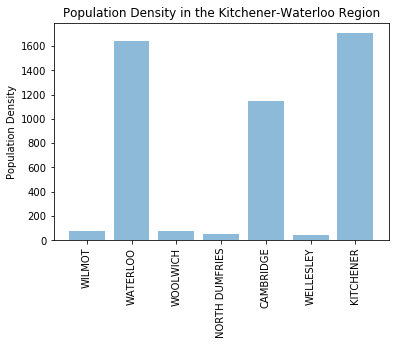

In [28]:
print (PopDensity_New['Population Density'])
y_pos = np.arange(len(Municipality))

plt.bar(y_pos, PopDensity_New['Population Density'], align='center', alpha=0.5)
plt.xticks(y_pos,PopDensity_New['Municipality'], rotation='vertical')
plt.ylabel('Population Density')
plt.title('Population Density in the Kitchener-Waterloo Region')
plt.show()

#### Municipality Boundary Data
Acquiring GeoJSON file and .csv file of the Region of Waterloo municipality boundaries from https://open-kitchenergis.opendata.arcgis.com/datasets/RMW::regional-boundaries/data

In [29]:
# -----------------------------------------------------------------------
# GeoJSON of Region of Waterloo
# -----------------------------------------------------------------------
GeoJSON_WaterlooRegion = r'https://opendata.arcgis.com/datasets/dc4eff944b774abdb6ee0e1931a8663f_17.geojson'
GeoJSON_Municipalities = r'https://opendata.arcgis.com/datasets/2840815b1dff4989b8c8513541a00b49_0.geojson'

In [30]:
KW_map = folium.Map(location=[KW_latitude, KW_longitude], zoom_start=10)
KW_map.choropleth(geo_data=GeoJSON_Municipalities)

# -----------------------------------------------------------------------
# Does this region cover our 6 studied municipalities?

# red circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(PopDensity_df_transpose.Latitude, PopDensity_df_transpose.Longitude, PopDensity_df_transpose.Municipality):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup = label,
        fill = True,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(KW_map)

KW_map

In [31]:
Municipality_df = pd.read_csv('Municipal_Boundary.csv', usecols= [0,1,2,3,4,5])

Municipality_df

,OBJECTID,MUNICIPALITY,PERIMETER,SDE_MUNICIPALITY_AREA,MUNICIPALITYID,CATEGORY
0,1,WILMOT,69.837948,266.183351,104,MUNICIPALITY
1,2,WATERLOO,41.257436,65.236477,100,MUNICIPALITY
2,4,WOOLWICH,100.704515,329.683461,103,MUNICIPALITY
3,5,NORTH DUMFRIES,85.626001,190.228732,101,MUNICIPALITY
4,6,CAMBRIDGE,60.045538,115.362894,106,MUNICIPALITY
5,7,WELLESLEY,65.456360,278.415743,102,MUNICIPALITY
6,1608,KITCHENER,59.752821,138.405656,105,MUNICIPALITY


In [32]:
# -----------------------------------------------------------------------
# Joining dataframes
# -----------------------------------------------------------------------
MunicipalitiesDensity_df = pd.concat([PopDensity_New, Municipality_df], axis = 1)
MunicipalitiesDensity_df.drop(columns = ['MUNICIPALITY'], axis = 1, inplace = True)
MunicipalitiesDensity_df

,Municipality,Latitude,Longitude,Population Density,OBJECTID,PERIMETER,SDE_MUNICIPALITY_AREA,MUNICIPALITYID,CATEGORY
0,WILMOT,43.435,-80.628,77.9,1,69.837948,266.183351,104,MUNICIPALITY
1,WATERLOO,43.464,-80.52,1639.8,2,41.257436,65.236477,100,MUNICIPALITY
2,WOOLWICH,43.534,-80.387,76.7,4,100.704515,329.683461,103,MUNICIPALITY
3,NORTH DUMFRIES,43.314,-80.391,54.5,5,85.626001,190.228732,101,MUNICIPALITY
4,CAMBRIDGE,43.432,-80.31,1149.6,6,60.045538,115.362894,106,MUNICIPALITY
5,WELLESLEY,43.5322,-80.7658,40.5,7,65.456360,278.415743,102,MUNICIPALITY
6,KITCHENER,43.453,-80.495,1705.2,1608,59.752821,138.405656,105,MUNICIPALITY


In [33]:
KW_map2 = folium.Map(location=[KW_latitude, KW_longitude], zoom_start=9)
KW_map2.choropleth(geo_data=GeoJSON_Municipalities, data=MunicipalitiesDensity_df,
             columns=['OBJECTID','Population Density'],
             key_on='feature.properties.OBJECTID',
             threshold_scale=[0, 70, 1100, 1400, 1700, 2000],
             fill_color='YlGnBu',
             legend_name='Population Density')
KW_map2

### Combining Current Yarn Store and Population Density Folium maps:

In [34]:
KW_map3 = folium.Map(location=[KW_latitude, KW_longitude], zoom_start=10)
KW_map3.choropleth(geo_data=GeoJSON_Municipalities, data=MunicipalitiesDensity_df,
             columns=['OBJECTID','Population Density'],
             key_on='feature.properties.OBJECTID',
             threshold_scale=[0, 70, 1100, 1400, 1700, 2000],
             fill_color='YlGnBu',
             legend_name='Population Density')

# -----------------------------------------------------------------------
# red circle markers = central Municipality coordinates
# -----------------------------------------------------------------------
for lat, lng, label in zip(PopDensity_df_transpose.Latitude, PopDensity_df_transpose.Longitude, PopDensity_df_transpose.Municipality):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        fill = True,
        popup = label,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(KW_map3)

# -----------------------------------------------------------------------
# add LYS as blue circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(DataframeFilteredLYS.lat, DataframeFilteredLYS.lng, DataframeFilteredLYS.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(KW_map3)
    

# -----------------------------------------------------------------------    
# add Michaels as green circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(DataframeFilteredMichaels.lat, DataframeFilteredMichaels.lng, DataframeFilteredMichaels.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(KW_map3)
    
    
KW_map3

### So now, what is the most ideal place for a new LYS?

A good estimation would include:

* Near high population density regions
* Far enough away from other yarn stores that competition isn't a concern
* Near highways for easy access
* Perhaps near high traffic shopping centers

So, we should now consider high traffic shopping centers.

In [35]:
search_query = 'shopping mall'
print(search_query + ' .... OK!')

radius = 50000 #meters
print("Searching a radius of", radius/1000, "km")
LIMIT = 50
print("Limiting the number of returned shopping centers to", LIMIT)

# -----------------------------------------------------------------
# create URL
# -----------------------------------------------------------------
url_Shopping = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, KW_latitude, KW_longitude, VERSION, search_query, radius, LIMIT)
print("URL generated:")
# -----------------------------------------------------------------
# display URL
# -----------------------------------------------------------------
url_Shopping

shopping mall .... OK!
Searching a radius of 50.0 km
Limiting the number of returned shopping centers to 50
URL generated:


'https://api.foursquare.com/v2/venues/search?client_id=5MXDGJBX0OMLHH0OPKIN3W44EBFGV1X0RCVBWAJSGBDPYQMS&client_secret=1SWB3DXCV5DJCF3JT0KMSEJDYJD4GHELTHWXRNARV0XRE0CJ&ll=43.452969,-80.495064&v=20190705&query=shopping mall&radius=50000&limit=50'

In [36]:
ResultsShopping = requests.get(url_Shopping).json()

# -----------------------------------------------------------------
# assign relevant part of JSON to venues
# -----------------------------------------------------------------
ShoppingCenters = ResultsShopping['response']['venues']

# -----------------------------------------------------------------
# tranform venues into a dataframe
# -----------------------------------------------------------------
DataframeShopping = json_normalize(ShoppingCenters)

In [37]:
DataframeShopping.shape

(50, 17)

In [38]:
DataframeShopping.drop(columns = {'id', 'referralId', 'hasPerk', 
                                  'location.labeledLatLngs', 'location.formattedAddress'}, axis=1, inplace = True)
DataframeShopping.head(7)

,name,categories,location.address,location.crossStreet,location.lat,location.lng,location.distance,location.postalCode,location.cc,location.city,location.state,location.country
0,Sunrise Shopping Centre,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",1400 Ottawa St. S.,at Fischer Hallman,43.415499,-80.515130,4475,N2E 4E2,CA,Kitchener,ON,Canada
1,Highland Hills Mall,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",NaN,NaN,43.429879,-80.526098,3591,NaN,CA,NaN,NaN,Canada
2,Evergreen mall,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",NaN,NaN,43.438204,-80.511748,2126,NaN,CA,NaN,NaN,Canada
3,Frederick Mall Pharmacy,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",385 Frederick St,NaN,43.457851,-80.473906,1794,N2H 2P2,CA,Kitchener,ON,Canada
4,Frederick Mall Blues Bar,[],NaN,NaN,43.457886,-80.473865,1798,NaN,CA,Waterloo Regional Municipality,ON,Canada
5,Frederick Mall,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",385 Frederick St.,at Edna St.,43.457314,-80.473144,1836,N2H 2P2,CA,Kitchener,ON,Canada
6,Stanley Park Mall,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",1005 Ottawa St. N,at River Rd. E,43.450863,-80.444298,4109,N2A 1H2,CA,Kitchener,ON,Canada


In [39]:
#------------------------------------------------------------------------
# Removing non-shopping centers, like bus-stops *at* malls.
#------------------------------------------------------------------------
DataframeShopping.dropna(subset=['location.address'], inplace = True)
DataframeShopping.shape

(28, 12)

In [40]:
DataframeShopping.head(7)

,name,categories,location.address,location.crossStreet,location.lat,location.lng,location.distance,location.postalCode,location.cc,location.city,location.state,location.country
0,Sunrise Shopping Centre,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",1400 Ottawa St. S.,at Fischer Hallman,43.415499,-80.515130,4475,N2E 4E2,CA,Kitchener,ON,Canada
3,Frederick Mall Pharmacy,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",385 Frederick St,NaN,43.457851,-80.473906,1794,N2H 2P2,CA,Kitchener,ON,Canada
5,Frederick Mall,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",385 Frederick St.,at Edna St.,43.457314,-80.473144,1836,N2H 2P2,CA,Kitchener,ON,Canada
6,Stanley Park Mall,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",1005 Ottawa St. N,at River Rd. E,43.450863,-80.444298,4109,N2A 1H2,CA,Kitchener,ON,Canada
7,SmartCentres Kitchener (Laurentian Mall),"[{'id': '5032885091d4c4b30a586d66', 'name': 'R...",245 Strasburg Road,NaN,43.425228,-80.487421,3149,N2E 3W7,CA,Kitchener,ON,Canada
8,Conestoga Mall,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",550 King Street North,NaN,43.497826,-80.527575,5641,N2L 5W6,CA,Waterloo,ON,Canada
9,University Downs Shopping Centre,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",425 University Ave. E.,at Bridge St. W.,43.494386,-80.491254,4620,N2K 3J4,CA,Waterloo,ON,Canada


In [41]:
# -----------------------------------------------------------------
# function that extracts the category of the venue
# -----------------------------------------------------------------
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# -----------------------------------------------------------------
# filter the category for each row
# -----------------------------------------------------------------
DataframeShopping['categories'] = DataframeShopping.apply(get_category_type, axis=1)

# -----------------------------------------------------------------
# clean column names by keeping only last term
# -----------------------------------------------------------------
DataframeShopping.columns = [column.split('.')[-1] for column in DataframeShopping.columns]

DataframeShopping

,name,categories,address,crossStreet,lat,lng,distance,postalCode,cc,city,state,country
0,Sunrise Shopping Centre,Shopping Mall,1400 Ottawa St. S.,at Fischer Hallman,43.415499,-80.515130,4475,N2E 4E2,CA,Kitchener,ON,Canada
3,Frederick Mall Pharmacy,Pharmacy,385 Frederick St,NaN,43.457851,-80.473906,1794,N2H 2P2,CA,Kitchener,ON,Canada
5,Frederick Mall,Shopping Mall,385 Frederick St.,at Edna St.,43.457314,-80.473144,1836,N2H 2P2,CA,Kitchener,ON,Canada
6,Stanley Park Mall,Shopping Mall,1005 Ottawa St. N,at River Rd. E,43.450863,-80.444298,4109,N2A 1H2,CA,Kitchener,ON,Canada
7,SmartCentres Kitchener (Laurentian Mall),Real Estate Office,245 Strasburg Road,NaN,43.425228,-80.487421,3149,N2E 3W7,CA,Kitchener,ON,Canada
8,Conestoga Mall,Shopping Mall,550 King Street North,NaN,43.497826,-80.527575,5641,N2L 5W6,CA,Waterloo,ON,Canada
9,University Downs Shopping Centre,Shopping Mall,425 University Ave. E.,at Bridge St. W.,43.494386,-80.491254,4620,N2K 3J4,CA,Waterloo,ON,Canada
13,Skytop Tailors (Stanley Park Mall),Men's Store,1005 Ottawa St N,River Rd,43.448957,-80.445539,4027,N2A 1H2,CA,Kitchener,ON,Canada
15,9 Lakeshore to Conestoga Mall,Bus Line,Davis Centre,University of Waterloo,43.475634,-80.533701,4013,NaN,CA,Waterloo,ON,Canada
18,Sport Chek Fairway Best Mall,Sporting Goods Shop,655 Fairway Road South,NaN,43.419450,-80.451980,5104,N2C 1X4,CA,Kitchener,ON,Canada


In [42]:
# Missed some non-shopping centers - Drop Bus Stations

DataframeShopping = DataframeShopping[DataframeShopping.categories != ("Bus Station")]
DataframeShopping = DataframeShopping[DataframeShopping.categories != ("Bus Line")]
DataframeShopping.drop_duplicates(subset="address", inplace=True)

In [43]:
DataframeShopping

,name,categories,address,crossStreet,lat,lng,distance,postalCode,cc,city,state,country
0,Sunrise Shopping Centre,Shopping Mall,1400 Ottawa St. S.,at Fischer Hallman,43.415499,-80.515130,4475,N2E 4E2,CA,Kitchener,ON,Canada
3,Frederick Mall Pharmacy,Pharmacy,385 Frederick St,NaN,43.457851,-80.473906,1794,N2H 2P2,CA,Kitchener,ON,Canada
5,Frederick Mall,Shopping Mall,385 Frederick St.,at Edna St.,43.457314,-80.473144,1836,N2H 2P2,CA,Kitchener,ON,Canada
6,Stanley Park Mall,Shopping Mall,1005 Ottawa St. N,at River Rd. E,43.450863,-80.444298,4109,N2A 1H2,CA,Kitchener,ON,Canada
7,SmartCentres Kitchener (Laurentian Mall),Real Estate Office,245 Strasburg Road,NaN,43.425228,-80.487421,3149,N2E 3W7,CA,Kitchener,ON,Canada
8,Conestoga Mall,Shopping Mall,550 King Street North,NaN,43.497826,-80.527575,5641,N2L 5W6,CA,Waterloo,ON,Canada
9,University Downs Shopping Centre,Shopping Mall,425 University Ave. E.,at Bridge St. W.,43.494386,-80.491254,4620,N2K 3J4,CA,Waterloo,ON,Canada
13,Skytop Tailors (Stanley Park Mall),Men's Store,1005 Ottawa St N,River Rd,43.448957,-80.445539,4027,N2A 1H2,CA,Kitchener,ON,Canada
18,Sport Chek Fairway Best Mall,Sporting Goods Shop,655 Fairway Road South,NaN,43.419450,-80.451980,5104,N2C 1X4,CA,Kitchener,ON,Canada
25,Manitou Mall,Office,25 Manitou Dr.,NaN,43.416844,-80.451715,5333,NaN,CA,Kitchener,ON,Canada


In [44]:
DataframeShopping.shape

(22, 12)

#### Adding these shopping centers to the map:

In [45]:
KW_map4 = folium.Map(location=[KW_latitude, KW_longitude], zoom_start=10)
KW_map4.choropleth(geo_data=GeoJSON_Municipalities, data=MunicipalitiesDensity_df,
             columns=['OBJECTID','Population Density'],
             key_on='feature.properties.OBJECTID',
             threshold_scale=[0, 70, 1100, 1400, 1700, 2000],
             fill_color='YlGnBu',
             legend_name='Population Density')

# -----------------------------------------------------------------------
# red circle markers = central Municipality coordinates
# -----------------------------------------------------------------------
for lat, lng, label in zip(PopDensity_df_transpose.Latitude, PopDensity_df_transpose.Longitude, PopDensity_df_transpose.Municipality):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        fill = True,
        popup = label,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(KW_map4)

# -----------------------------------------------------------------------
# add LYS as blue circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(DataframeFilteredLYS.lat, DataframeFilteredLYS.lng, DataframeFilteredLYS.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(KW_map4)
    

# -----------------------------------------------------------------------    
# add Michaels as cyan circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(DataframeFilteredMichaels.lat, DataframeFilteredMichaels.lng, DataframeFilteredMichaels.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='cyan',
        popup=label,
        fill = True,
        fill_color='cyan',
        fill_opacity=0.6
    ).add_to(KW_map4)
    
# -----------------------------------------------------------------------    
# add shopping mall locations as yellow circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(DataframeShopping.lat, DataframeShopping.lng, DataframeShopping.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(KW_map4)
    
    
KW_map4

## Discussion and Conclusions

By inspection, let's choose 5 locations that meet the above criteria:

* Waterloo - Near: Conestoga Mall, off HWY 85, high population density.
* Kitchener - Near: Stanley Park Mall, off HWY 8 & HWY 7, high population density.
* Kitchener - Near: Manitou Mall, Best Mall, and Michaels. This would be okay as Michaels isn't exactly the same as a LYS, thus enabling each type of store to have their own niche markets. In fact, customers would likely view this as a "two birds, one stone" scenario.
* Cambridge - Near: Pinebush Rd, off HWY 401. Also a Michaels here, see above comment.
* Cambridge - Near: Cambridge Center Mall, off HWY 401.

Coordinates:

In [46]:
Name = ["Waterloo","Kitchener1","Kitchener2","Cambridge1","Cambridge2"]
Lat = [43.504908, 43.449778, 43.419447, 43.410260, 43.394857]
Long = [-80.535593, -80.445249, -80.447637, -80.326141,-80.322914]

Columns = ("Name", "Lat", "Long")

GuesstimateDataframe = pd.DataFrame([Name, Lat, Long], index = Columns)
GuesstimateDataframe_transpose = GuesstimateDataframe.T
GuesstimateDataframe_transpose

,Name,Lat,Long
0,Waterloo,43.5049,-80.5356
1,Kitchener1,43.4498,-80.4452
2,Kitchener2,43.4194,-80.4476
3,Cambridge1,43.4103,-80.3261
4,Cambridge2,43.3949,-80.3229


In [47]:
KW_map5 = folium.Map(location=[KW_latitude, KW_longitude], zoom_start=10)
KW_map5.choropleth(geo_data=GeoJSON_Municipalities, data=MunicipalitiesDensity_df,
             columns=['OBJECTID','Population Density'],
             key_on='feature.properties.OBJECTID',
             threshold_scale=[0, 70, 1100, 1400, 1700, 2000],
             fill_color='YlGnBu',
             legend_name='Population Density')

# -----------------------------------------------------------------------
# red circle markers = central Municipality coordinates
# -----------------------------------------------------------------------
for lat, lng, label in zip(PopDensity_df_transpose.Latitude, PopDensity_df_transpose.Longitude, PopDensity_df_transpose.Municipality):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        fill = True,
        popup = label,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(KW_map5)

# -----------------------------------------------------------------------
# add LYS as blue circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(DataframeFilteredLYS.lat, DataframeFilteredLYS.lng, DataframeFilteredLYS.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(KW_map5)
    

# -----------------------------------------------------------------------    
# add Michaels as cyan circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(DataframeFilteredMichaels.lat, DataframeFilteredMichaels.lng, DataframeFilteredMichaels.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='cyan',
        popup=label,
        fill = True,
        fill_color='cyan',
        fill_opacity=0.6
    ).add_to(KW_map5)
    
# -----------------------------------------------------------------------    
# add shopping mall locations as yellow circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(DataframeShopping.lat, DataframeShopping.lng, DataframeShopping.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(KW_map5)
    
# -----------------------------------------------------------------------    
# add shopping mall locations as white circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(GuesstimateDataframe_transpose.Lat, GuesstimateDataframe_transpose.Long, GuesstimateDataframe_transpose.Name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='black',
        popup=label,
        fill = True,
        fill_color='white',
        fill_opacity=0.6
    ).add_to(KW_map5)
    
    
KW_map5

Or, alternatively, mapping on their own:

In [48]:
KW_map6 = folium.Map(location=[KW_latitude, KW_longitude], zoom_start=10)
KW_map6.choropleth(geo_data=GeoJSON_Municipalities, data=MunicipalitiesDensity_df,
             columns=['OBJECTID','Population Density'],
             key_on='feature.properties.OBJECTID',
             threshold_scale=[0, 70, 1100, 1400, 1700, 2000],
             fill_color='YlGnBu',
             legend_name='Population Density')
    
# -----------------------------------------------------------------------    
# add shopping mall locations as white circle markers
# -----------------------------------------------------------------------
for lat, lng, label in zip(GuesstimateDataframe_transpose.Lat, GuesstimateDataframe_transpose.Long, GuesstimateDataframe_transpose.Name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='black',
        popup=label,
        fill = True,
        fill_color='white',
        fill_opacity=0.6
    ).add_to(KW_map6)
    
KW_map6

## Conclusions

Considering the population density, the central nature within the region, and the nearness to local highways, the potential Local Yarn Store (LYS) locations in KITCHENER would likely be the most successful.